# Annotating workflows

Annotating workflows with pyiron as example. Note that `pyiron_atomistics` needs to be installed for this notebook.

In [1]:
%config IPCompleter.evaluation='unsafe'

In [2]:
from pyiron_atomistics import Project
from atomrdf import KnowledgeGraph
import numpy as np

Set up a project and a Knowledge Graph

In [3]:
project = 'wf1cbd'
pr = Project(project)

kg = KnowledgeGraph(store='db', store_file=f'{project}.db')
kg.enable_workflow(pr, workflow_environment='pyiron')

Create a structure

In [4]:
structure = pr.create.structure.annotated_structure.bulk('Cu', cubic=True)

/home/srmnitc/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/srmnitc/miniforge3/envs/workflow-rdf/lib/python3.11/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


In [5]:
structure.plot3d()

NGLWidget()

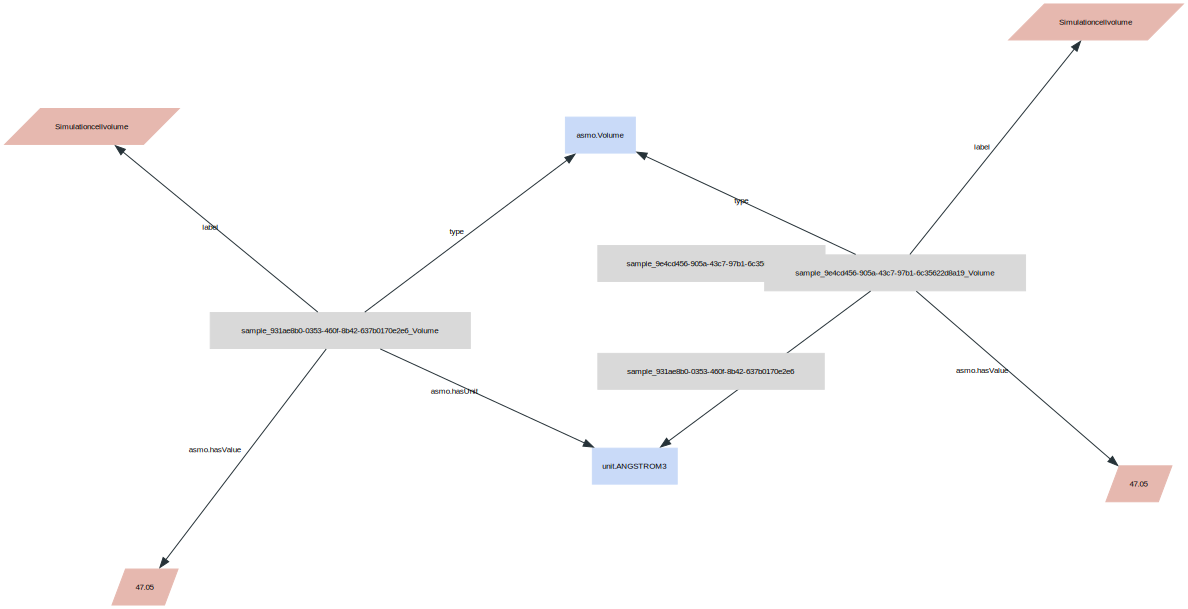

In [6]:
kg.visualise(workflow_view=True)

Create a NPT lammps simulation and run it

In [7]:
job = pr.create.job.Lammps('j1', delete_existing_job=True, delete_aborted_job=True)
job.structure = structure
job.potential = '2001--Mishin-Y--Cu-1--LAMMPS--ipr1'
job.calc_md(pressure=0, temperature=500)
job.run()

The job j1 was saved and received the ID: 1198


Add the finished job to the knowledge graph

In [9]:
kg.add_workflow(job, workflow_environment='pyiron')

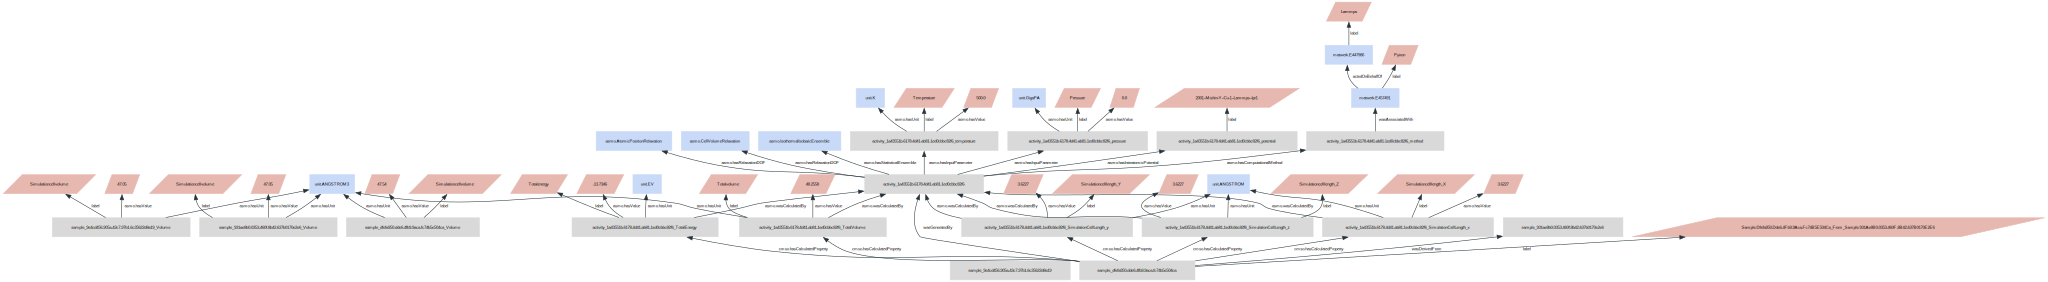

In [10]:
kg.visualise(workflow_view=True, hide_types=True, size=(40,20), layout='dot')

In [16]:
job.output.energy_pot

array([-14.15964757, -13.97327985, -14.11273703, -13.92329545,
       -13.91915133, -14.01599436, -14.0250745 , -13.9890173 ,
       -13.96766322, -13.83215377, -14.00427501])

In [17]:
job.output.energy_tot

array([-13.77186713, -13.77697608, -13.70030491, -13.53680957,
       -13.60278348, -13.81827977, -13.89038944, -13.84326937,
       -13.72715073, -13.692135  , -13.72026466])

In [18]:
job.decompress()